In [27]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn import datasets

# Voting
from sklearn.ensemble import VotingClassifier

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

# ensemble
- 여러개의 분류 모델을 조합해서 더 나은 성능을 내는 방법

In [28]:
# RandomForest : 의사결정나무를 단일 모델 조합해서 예측을 실행하는 모델
np.random.seed(5)


In [29]:
# 손글씨 데이터
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [30]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [31]:
# 의사결정나무를 이용한 10번의 교차 검증 10번실시 => 정확도를 보기 위해서
cv_scores = []
cv = tree.DecisionTreeClassifier()

for i in range(10):
    score = cross_val_score(cv, features, labels, cv=10, scoring='accuracy')
    cv_scores.append(score.mean())

cv_scores

[0.8280229671011794,
 0.8235630043451273,
 0.8224674115456239,
 0.8235692116697703,
 0.8341464928615766,
 0.8185692116697704,
 0.8241247672253259,
 0.8180136561142148,
 0.8235630043451272,
 0.8258038485412786]

In [32]:
# RandomForest를 이용한 10번의 교차 검증 10번실시 => 정확도를 보기 위해서
rf_scores = []
rf = RandomForestClassifier()

for i in range(10):
    score = cross_val_score(rf, features, labels, cv=10, scoring='accuracy')
    rf_scores.append(score.mean())

rf_scores

[0.9526939788950962,
 0.9487957790192427,
 0.9510211049037863,
 0.9549286157666046,
 0.9471322160148976,
 0.9487988826815641,
 0.952122905027933,
 0.9454531346989447,
 0.9460180012414648,
 0.9471322160148976]

In [33]:
def cross_validation(classifier, features, labels):
    cv_scores = []
    for i in range(10):
        score = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(score.mean())
    return cv_scores

In [34]:
# 의사결정나무
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)
dt_cv_scores

[0.8330509000620733,
 0.8224736188702669,
 0.8268963376784605,
 0.8246710117939168,
 0.825788330229671,
 0.821880819366853,
 0.833584729981378,
 0.8280167597765363,
 0.826340782122905,
 0.8235816263190564]

In [35]:
# RandomForest
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)
rf_cv_scores

[0.9504655493482307,
 0.9410117939168219,
 0.9510211049037863,
 0.9549162011173185,
 0.9504469273743016,
 0.9449130974549969,
 0.9510117939168218,
 0.9493513345747981,
 0.9488081936685286,
 0.9471198013656114]

### RandomForest와 의사결정나무의 정확도의 시각화

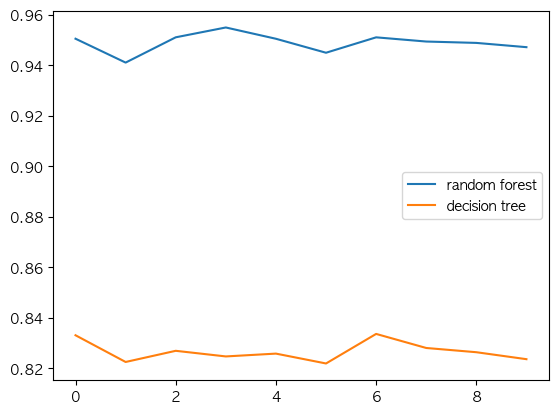

In [36]:
cv_list = {'random forest' : rf_cv_scores, 'decision tree': dt_cv_scores}
df = pd.DataFrame(cv_list)
df.plot()
plt.show()

### 보팅(Voting) 앙상블
: 단일 모델을 앙상블하여 더 나은 예측을 하는 모델 생성

In [37]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [38]:
# 1) 단일 모델 정확도 측정
# 의사결정나무
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree.score(x_test, y_test)

0.8638888888888889

In [39]:
# KNN
knn = KNeighborsClassifier().fit(x_train, y_train)
knn.score(x_test, y_test)

0.9805555555555555

In [40]:
# SVM
svm = SVC(probability=True).fit(x_train, y_train)
svm.score(x_test, y_test)

0.9861111111111112

2) 하드보팅
: 각각의 분류기의 예측값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식

In [41]:
voting_clf = VotingClassifier(
    estimators=[('decision_tree', dtree), ('KNN', knn), ('SVM', svm)],
    weights=[1,1,1],
    voting='hard',
).fit(x_train, y_train)

voting_clf.score(x_test, y_test)

0.9861111111111112

3) 소프트 보팅
: 각각의 분류모델을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종 결론을 내는 방식

In [42]:
voting_clf = VotingClassifier(
    estimators=[('decision_tree', dtree), ('KNN', knn), ('SVM', svm)],
    weights=[1,1,1],
    voting='soft',
).fit(x_train, y_train)

voting_clf.score(x_test, y_test)

0.9833333333333333